<a href="https://colab.research.google.com/github/shahd1995913/Tahalf-Mechine-Learning-DS3/blob/main/Exercise/ML1_S5_Exercise_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML1-S3 (K Nearest Neighbor (`KNN`) Algorithm)👨🏻‍💻
---

### Agenda
- [Introduction](#Introduction)
- [How does KNN Work?](#How)
- [Model Representation](#Representation)
- [Required Data Preparation](#Preparation)
- [sklean Implementation](#Implementation)
- [Implementation from scratch](#scratch)
- [Compaire models](#Compaire)

## <a id='Introduction'></a> `Introduction`
---
**K Nearest Neighbor** algorithm falls under the `Supervised` Learning category and is used for **classification** (most commonly) and **regression**. It is a versatile algorithm also used for imputing missing values and resampling datasets. As the name (K Nearest Neighbor) suggests it considers K Nearest Neighbors (Data points) to predict the class or continuous value for the new Datapoint.
<img src=https://machinelearningknowledge.ai/wp-content/uploads/2018/08/KNN-Classification.gif width= 500>

**The algorithm’s learning is**:

---
1. Instance-based learning: Here we do not learn weights from training data to predict output (as in model-based algorithms) but use entire training instances to predict output for unseen data.


2. Lazy Learning: Model is not learned using training data prior and the learning process is postponed to a time when prediction is requested on the new instance.


3. Non -Parametric: In KNN, there is no predefined form of the mapping function.
---

## <a id='How'></a> `How does KNN Work?`
---
👉**Principle**:

Consider the following figure. Let us say we have plotted data points from our training set on a two-dimensional feature space. As shown, we have a total of 6 data points (3 red and 3 blue). 

Red data points belong to `class1` and blue data points belong to `class2`. 

And yellow data point in a feature space represents the new point for which a class is to be predicted. Obviously, we say it belongs to ‘class1’ (red points)

**Why?** 🤔➨ Because its nearest neighbors belong to that class!
<img src=https://editor.analyticsvidhya.com/uploads/17303KNN%20working.png width=400>

Yes, this is the principle behind K Nearest Neighbors. Here, nearest neighbors are those data points that have minimum distance in feature space from our new data point. And K is the number of such data points we consider in our implementation of the algorithm. Therefore, distance metric and K value are two important considerations while using the KNN algorithm. Euclidean distance is the most popular distance metric. You can also use Hamming distance, Manhattan distance, Minkowski distance as per your need. For predicting class/ continuous value for a new data point, it considers all the data points in the training dataset. Finds new data point’s ‘K’ Nearest Neighbors (Data points) from feature space and their class labels or continuous values.

Then:

- For classification: A class label assigned to the majority of K Nearest Neighbors from the training dataset is considered as a predicted class for the new data point.

- For regression: Mean or median of continuous values assigned to K Nearest Neighbors from training dataset is a predicted continuous value for our new data point
---

## <a id='Representation'></a> `Model Representation`
--- 

Here, we do not learn weights and store them, instead, the entire training dataset is stored in the memory. Therefore, model representation for KNN is the entire training dataset.

### How to choose the value for K?** 🤔
---

**K is a crucial parameter in the KNN algorithm. Some suggestions for choosing K Value are**:

1. Using error curves: The figure below shows error curves for different values of K for training and test data.

    At low K values, there is overfitting of data/high variance. Therefore test error is high and train error is low. At K=1 in train data, the error is always zero, because the nearest neighbor to that point is that point itself. Therefore though training error is low test error is high at lower K values. This is called overfitting. As we increase the value for K, the test error is reduced.

    But after a certain K value, bias/ underfitting is introduced and test error goes high. So we can say initially test data error is high(due to variance) then it goes low and stabilizes and with further increase in K value, it again increases(due to bias). The K value when test error stabilizes and is low is considered as optimal value for K. From the above error curve we can choose K=8 for our KNN algorithm implementation.

    <img src=https://editor.analyticsvidhya.com/uploads/47280kvalue.png width=400>


2. Also, domain knowledge is very useful in choosing the K value.

3. K value should be odd while considering binary(two-class) classification.
---

## <a id='Preparation'></a> `Required Data Preparation`
---
1. Data Scaling: To locate the data point in multidimensional feature space, it would be helpful if all features are on the same scale. Hence normalization or standardization of data will help.

2. Dimensionality Reduction: KNN may not work well if there are too many features. Hence dimensionality reduction techniques like feature selection, principal component analysis can be implemented.

3. Missing value treatment: If out of M features one feature data is missing for a particular example in the training set then we cannot locate or calculate distance from that point. Therefore deleting that row or imputation is required.

## <a id='Implementation'></a> `sklean Implementation`
---

In [ ]:
#First, let’s import all required libraries.
#============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

After loading important libraries, we create our data using sklearn.datasets with 200 samples, 8 features, and 2 classes. Then data is split into the train(80%) and test(20%) data and scaled using StandardScaler.

In [ ]:
X,Y=make_classification(n_samples= 200,n_features=8,n_informative=8,n_redundant=0,n_repeated=0,n_classes=2,random_state=14)
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2,random_state=32)
sc= StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
sc.fit(X_test)
X_test= sc.transform(X_test)
X.shape

(200, 8)

For choosing the K value, we use error curves and K value with optimal variance, and bias error is chosen as K value for prediction purposes. With the error curve plotted below, we choose K=7 for the prediction 

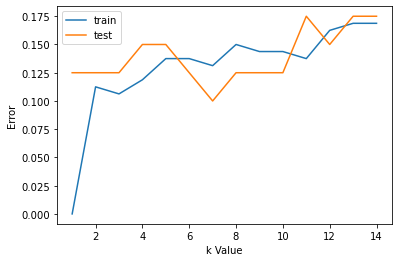

In [ ]:
# Step 2: Find the value for K
#====================================
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In step 2, we have chosen the K value to be 7. Now we substitute that value and get the accuracy score = 0.9 for the test data.

In [ ]:
#Step 3: Predict:
#======================
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred) == 0.9

True

## <a id='scratch'></a> `Implementation from scratch`
---

In [ ]:
# load dataset
#======================
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn.datasets import load_iris

#Loading the Data
iris= load_iris()

In [ ]:
# Split X and Y
#======================

# Store features matrix in X
X= iris.data
#Store target vector in 
Y= iris.target

X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2,random_state=32)

### psudo code

K-nearest neighbors (KNN) algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set. We can understand its working with the help of following steps −

- Step 1 ➨ For implementing any algorithm, we need dataset. So during the first step of KNN, we must load the training as well as test data.

- Step 2 ➨ Next, we need to choose the value of K i.e. the nearest data points. K can be any integer.

- Step 3 ➨ For each point in the test data do the following:

     * 3.1 − Calculate the distance between test data and each row of training data with the help of any of the method namely: Euclidean, Manhattan or Hamming distance. The most commonly used method to calculate distance is Euclidean.

     * 3.2 − Now, based on the distance value, sort them in ascending order.

     * 3.3 − Next, it will choose the top K rows from the sorted array.

     * 3.4 − Now, it will assign a class to the test point based on most frequent class of these rows.

- Step 4 ➨ End

In [ ]:
class MyKNN():
    def __init__(self,X,Y,dist):
        self.X_train = X
        self.Y_train = Y
        self.metric = dist
        
    def euclidean_distance(self,p1,p2):
        ''' this helper function calculates the euclidean distance between two given points '''
        # the equation : sqrt(sum((x - y)^2))
        dist = np.sqrt(np.sum( (p1-p2)**2 ))
        return dist

    def manhattan_distance(self,p1,p2):
        ''' this helper function calculates the manhattan distance between two given points '''
        # the equation : sum(|x - y|)
        dist = sum(abs(p1-p2))
        return dist

    def calc_distance(self,p1,p2,metric="euclidean"):
        ''' This function calculate the distance between two numbers based on the given distance metric 

        INPUTS : 
        p1 : first point or vector (numpy array)
        p2 : second point or vector (numpy array)
        metric : the distance metric (string)
        Returns : 
        distance value as a float number 
        '''

        if metric == "euclidean":
            dist = self.euclidean_distance(p1,p2)
        elif metric =="manhattan" :
            dist = self.manhattan_distance(p1,p2)

        else :
            print("you have entered invalid metric value")
            print("please Choose between 'euclidean' and 'manhattan' ")
            raise ValueError
        return dist

    def predict(self,X,y,X_,neighbors):
        ''' This function KNN algorithm implementation 
        Inputs :
            X : the training features vectors 
            y : the training targets/labels vectors 
            X_ : the input features we want to calculate the call for. 
            neighbors : the numbers of naghbors to calculate on. 
            metric : the distance metric we will calculate on 

        Output :
            y_ : list of the predicted classes for our input 
        '''

        #create output list
        y_ = []

        #iterate over inputs 
        for p in X_ :
            dists = []
            #calculate the distance between each point and the training data
            for px in X:
                dist = self.calc_distance(p,px,metric=self.metric)
                dists.append(dist)
            #get the minimun k distances    
            mins = np.argsort(dists)[:neighbors]

            # get the most repeated class
            classes = [y[i] for i in mins]
            pred = max(set(classes), key = classes.count)
            y_.append(pred)
        return y_
    

In [ ]:
#create model and predict
#==============================
knn = MyKNN(X,Y,"euclidean")
y_ = knn.predict(X_train,y_train,X_test,7)

In [ ]:
# Accuracy
#==========================
from sklearn.metrics import accuracy_score

custom_model_score = accuracy_score(y_test,y_)

print(custom_model_score)

0.9666666666666667


## <a id='Compaire'></a> `Compaire models`
---

#### sklearn model 

In [ ]:
# 7 kneighbors distance euclidean  
knn= KNeighborsClassifier(n_neighbors=7,metric="euclidean")
# fit model
knn.fit(X_train,y_train)
#predict on test dataset
y_pred= knn.predict(X_test)
#get accuracy
sklearn_model_score = metrics.accuracy_score(y_test,y_pred)

In [ ]:
print (sklearn_model_score == custom_model_score)

True


---
# Homework
---
Tie break :


Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.